### Procedure for making OHLC candels

In [1]:
# Python 3.8.2 kernel
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io
import statsmodels.api as sm                             ####   reference print(sm.datasets.macrodata.NOTE) 
pd.set_option('display.max_columns', None)
import plotly.graph_objects as go
import seaborn as sns

### Import Final DS - - - from lr1 = specifically chosen linear run fitting linear regression analysis
- Read LR ds
- Create Input Parameters
- Create X and y Datasets


In [6]:
## procedural functions for OHLC candles
from functools import reduce

def merge_manyDF(df1, df2):
    data_frames = [df1, df2]
    df_merged = reduce(lambda  left, right: pd.merge(left, right, on='Date', how='outer'), data_frames)
    return df_merged

def resampling_10min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10min', on= on_name).max()             
    dfLow = df.resample('10min', on= on_name).min() 
    dfOpen = df.resample('10min', on= on_name).first() 
    dfClose = df.resample('10min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).max()             
    dfLow = df.resample('2S', on= on_name).min() 
    dfOpen = df.resample('2S', on= on_name).first() 
    dfClose = df.resample('2S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_10Sec(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('10S', on= on_name).max()             
    dfLow = df.resample('10S', on= on_name).min() 
    dfOpen = df.resample('10S', on= on_name).first() 
    dfClose = df.resample('10S', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3Min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).max()             
    dfLow = df.resample('3T', on= on_name).min() 
    dfOpen = df.resample('3T', on= on_name).first() 
    dfClose = df.resample('3T', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_2Sec_BidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('2S', on= on_name).sum()             
    dfLow = df.resample('2S', on= on_name).sum() 
    dfOpen = df.resample('2S', on= on_name).sum() 
    dfClose = df.resample('2S', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1T', on= on_name).sum()             
    dfLow = df.resample('1T', on= on_name).sum() 
    dfOpen = df.resample('1T', on= on_name).sum() 
    dfClose = df.resample('1T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_3MinBidAsk(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 sec'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('3T', on= on_name).sum()             
    dfLow = df.resample('3T', on= on_name).sum() 
    dfOpen = df.resample('3T', on= on_name).sum() 
    dfClose = df.resample('3T', on= on_name).sum() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def resampling_1min(col1, name1, on_col, on_name):
    '''make resampled df from columns for 1 min'''  # .fillna(0)
    df = pd.DataFrame({name1: col1, on_name: on_col})
    dfHigh = df.resample('1min', on= on_name).max()             
    dfLow = df.resample('1min', on= on_name).min() 
    dfOpen = df.resample('1min', on= on_name).first() 
    dfClose = df.resample('1min', on= on_name).last() 
    
    res_df1 = merge_manyDF(dfOpen, dfHigh)
    res_df2 = merge_manyDF(dfLow, dfClose)
    final = merge_manyDF(res_df1, res_df2)
    return final

def merge_DFs(d1, d2, d3):
    d = pd.DataFrame()
    d = pd.merge(d1, d2, on='Date')
    d = pd.merge(d, d3, on='Date')
    return d

In [2]:
l = r"C:\Users\tonya\Desktop\SpringBoardAssignments\Story\ES2022-10-03SecLR3.csv"

In [3]:
lr1 = pd.read_csv(l, index_col='Date' )
lr1.index = pd.to_datetime(lr1.index)
lr1['new_time'] = pd.to_datetime(lr1.index).astype('int64') / 100 ** 9
lr1['Date'] = lr1.index
lr1.head()


Vol  BidAsk    Price  BidAskCum  new_time  \
Date                                                             
2022-10-03 04:00:00  103     -56  3601.25       1678   1.66477   
2022-10-03 04:00:01   13      -9  3600.25       1669   1.66477   
2022-10-03 04:00:02   36     -17  3599.75       1652   1.66477   
2022-10-03 04:00:03   21       1  3599.25       1653   1.66477   
2022-10-03 04:00:04    6      -4  3599.00       1649   1.66477   

                                   Date  
Date                                     
2022-10-03 04:00:00 2022-10-03 04:00:00  
2022-10-03 04:00:01 2022-10-03 04:00:01  
2022-10-03 04:00:02 2022-10-03 04:00:02  
2022-10-03 04:00:03 2022-10-03 04:00:03  
2022-10-03 04:00:04 2022-10-03 04:00:04

In [4]:
lr1.shape
type(lr1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
lr1_1min = resampling_2Sec(lr1['Price'], 'Price', lr1.Date, 'Date')  
mapping1M = {lr1_1min.columns[0]: 'Open', lr1_1min.columns[1]: 'High', lr1_1min.columns[2]: 'Low', lr1_1min.columns[3]: 'Close'}
lr1_1min = lr1_1min.rename(columns= mapping1M)
lr1_1min.head(2)
lr1_1min.shape  #   1 min = (21, 4)  

lr1Vol = resampling_2Sec_BidAsk(lr1['Vol'], 'Vol', lr1.Date, 'Date')
mapping1 = {lr1Vol.columns[1]: 'Vol'}
lr1Vol = lr1Vol.rename(columns= mapping1)
del lr1Vol['Vol_x_x']
del lr1Vol['Vol_y_y']
del lr1Vol['Vol_x_y']
lr1Vol.head(5)
lr1Vol.shape # (21, 4)

nqBidAsk1 = resampling_2Sec_BidAsk(lr1['BidAsk'], 'BidAsk', lr1.Date, 'Date')
mappingBA = {nqBidAsk1.columns[1]: 'BidAsk'}
nqBidAsk1 = nqBidAsk1.rename(columns= mappingBA)
del nqBidAsk1['BidAsk_x_x']
del nqBidAsk1['BidAsk_x_y']
del nqBidAsk1['BidAsk_y_y']
nqBidAsk1.sample(20)
nqBidAsk1.shape     # (21, 4)

lr1Min = merge_DFs(nqBidAsk1, lr1Vol, lr1_1min)
lr1Min.shape                                # (21, 6)
lr1Min.dropna(inplace=True)
lr1Min.shape     #     (21, 6)
lr1Min.sample(3)
# lr1Min.to_csv('2022-09-19_ES_1m_LR.csv')    # save 1 min LR OHLC set

BidAsk  Vol     Open     High      Low    Close
Date                                                                
2022-10-03 08:59:44       0   23  3636.25  3636.25  3636.25  3636.25
2022-10-03 13:07:34     -29   99  3670.00  3670.00  3670.00  3670.00
2022-10-03 10:58:44     -15  119  3671.00  3671.00  3671.00  3671.00

In [8]:
lr1Min['new_time'] = pd.to_datetime(lr1Min.index).astype('int64') / 100 ** 9
lr1Min.head()

BidAsk  Vol     Open     High      Low    Close  new_time
Date                                                                          
2022-10-03 04:00:00     -65  116  3601.25  3601.25  3600.25  3600.25   1.66477
2022-10-03 04:00:02     -16   57  3599.75  3599.75  3599.25  3599.25   1.66477
2022-10-03 04:00:04       2   26  3599.00  3599.25  3599.00  3599.25   1.66477
2022-10-03 04:00:06      -6   20  3599.00  3599.00  3598.75  3598.75   1.66477
2022-10-03 04:00:08       4    8  3599.25  3599.25  3598.75  3598.75   1.66477

In [163]:
lr1Min.shape                # (20594, 7)
lr1Min.head()  

BidAsk  Vol     Open     High      Low    Close  \
Date                                                                   
2022-10-03 04:00:00     -65  116  3601.25  3601.25  3600.25  3600.25   
2022-10-03 04:00:02     -16   57  3599.75  3599.75  3599.25  3599.25   
2022-10-03 04:00:04       2   26  3599.00  3599.25  3599.00  3599.25   
2022-10-03 04:00:06      -6   20  3599.00  3599.00  3598.75  3598.75   
2022-10-03 04:00:08       4    8  3599.25  3599.25  3598.75  3598.75   

                     new_time                Time  
Date                                               
2022-10-03 04:00:00   1.66477 2022-10-03 04:00:00  
2022-10-03 04:00:02   1.66477 2022-10-03 04:00:02  
2022-10-03 04:00:04   1.66477 2022-10-03 04:00:04  
2022-10-03 04:00:06   1.66477 2022-10-03 04:00:06  
2022-10-03 04:00:08   1.66477 2022-10-03 04:00:08

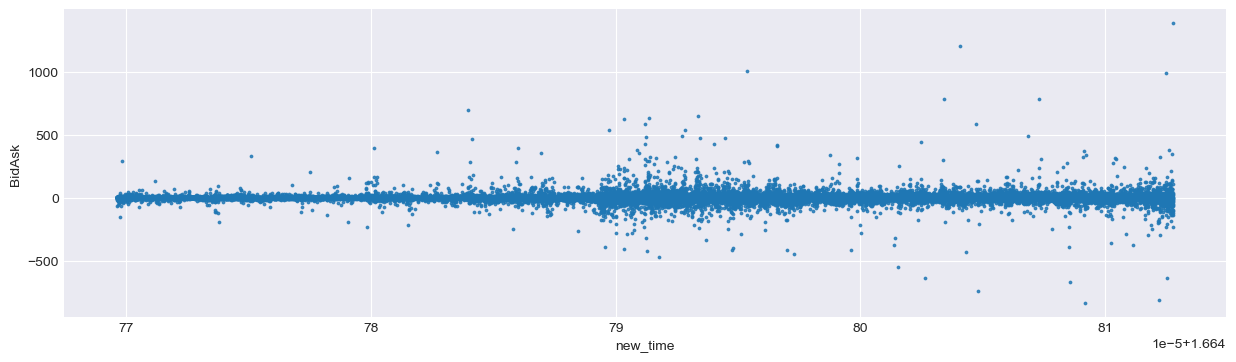

In [10]:
plt.figure(figsize=(15,4))   # lr1_1min
sns.regplot(x= 'new_time' , y= 'BidAsk', data= lr1Min, scatter_kws={"s": 3})

Conclusion: 
- `BidAsk is very slightly below 0 and this is Downward Linear Run. Could be true to extrapolate thatr in Upward Linear Runs BidAsk is slightly above 0?` 

Verify on different LR's!  

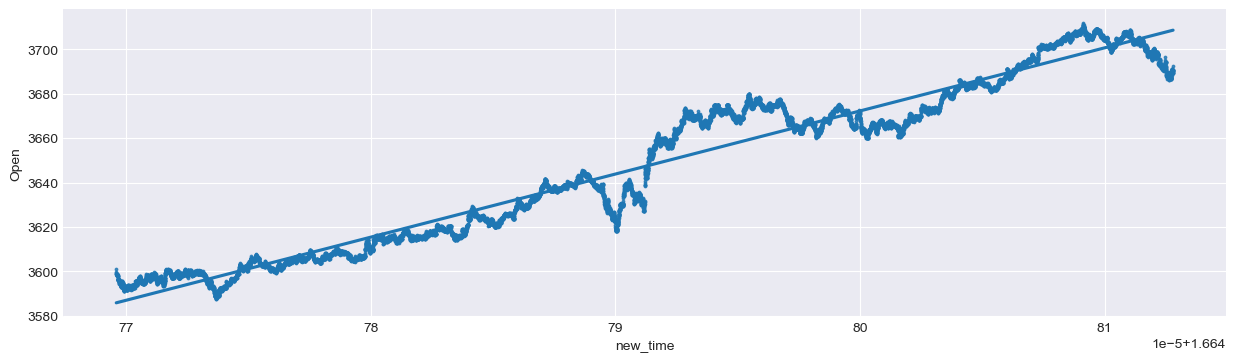

In [149]:
plt.figure(figsize=(15,4))
sns.regplot(x= 'new_time' , y= 'Open', data= lr1Min, scatter_kws={"s": 3})

In [12]:
hovertext=[]
for i in range(len(lr1Min['Open'])):
    hovertext.append('Open: '+ str(lr1Min['Open'][i])+'<br>Close: '+ str(lr1Min['Close'][i]))
    
fig = go.Figure(data= go.Ohlc(x= lr1Min.index, open= lr1Min['Open'], high= lr1Min['High'],  
                low= lr1Min['Low'], close= lr1Min['Close'], text= hovertext, hoverinfo= 'text'))
fig.show()

In [20]:
lr1Min.isna().sum()  # no NaN values
# lr1Min.fillna(method='bfill', inplace=True)
# lr1Min.fillna(method='ffill')

BidAsk      0
Vol         0
Open        0
High        0
Low         0
Close       0
new_time    0
dtype: int64

### Create Input Parameters

#### Create custom derived features, which will help in making the prediction.

- S_1, S_3, S_5: 1-min, 3-min and 5-min moving average for set from Close prices, respectively.
- Corr: Compute the correlation between the Close price and S_3.
- Std_U,Std_D: Difference between High & Open, Open & Low respectively.
- OD, OL: Difference between Open & previous minute's Open, and Open & previous minute's Close respectively.

In [21]:
lr1Min.shape  # (20594, 7)   
# lr1_1min = lr1Min.copy()
# lr1_1min.shape      #  (20594, 7)
lr1_1min.columns

Index(['BidAsk', 'Vol', 'Open', 'High', 'Low', 'Close', 'new_time'], dtype='object')

In [ ]:
# del lr1_1min['BA_5Cum'] 
# del lr1_1min['BA_1']
# del lr1_1min['BA_1SumMean']
# lr1_1min.fillna(method='bfill', inplace=True)
# lr1_1min['2022-09-19 11:17:00':'2022-09-19 11:37:00'].head(10)
# lr1_1min['2022-09-19 11:17:00':'2022-09-19 11:37:00'].tail(20)


In [142]:
# del lr1_1min['BA_3SumMean']
# del lr1_1min['BA_5SumMean']
# del lr1_1min['BA_9SumMean'] 

In [22]:
lr1_1min['BA_3'] =  lr1_1min['BidAsk'].rolling(3).mean()
lr1_1min['BA_5'] =  lr1_1min['BidAsk'].rolling(5).mean()
lr1_1min['BA_10'] =  lr1_1min['BidAsk'].rolling(10).mean()
lr1_1min['BA_CumSum'] = lr1_1min['BidAsk'].cumsum()

# lr1_1min['BA_3SumMean'] =  lr1_1min['BidAsk'].rolling(3).var() #* lr1_1min['Vol'].shift(10) 
# lr1_1min['BA_5SumMean'] =  lr1_1min['BidAsk'].rolling(5).var() #* lr1_1min['Vol'].shift(30) 
# lr1_1min['BA_9SumMean'] =  lr1_1min['BidAsk'].rolling(9).var() #* lr1_1min['Vol'].shift(50) 


In [23]:
# Calculate 2-min moving average of Close prices
lr1_1min['S_2'] = lr1_1min['Close'].rolling(2).mean()
# Calculate 5-min moving average of close prices
lr1_1min['S_5'] = lr1_1min['Close'].rolling(5).mean()

# Calculate 9-min moving average of Close prices
lr1_1min['S_9'] = lr1_1min['Close'].rolling(9).mean()

In [205]:
lr1_1min.sample(10)

BidAsk  Vol     Open     High      Low    Close  \
Date                                                                   
2022-10-03 14:04:32      14   22  3686.25  3686.50  3686.25  3686.50   
2022-10-03 09:18:44      11   50  3644.00  3644.25  3644.00  3644.25   
2022-10-03 07:29:00       4    4  3615.50  3615.50  3615.50  3615.50   
2022-10-03 13:38:04     -11   26  3684.75  3684.75  3684.50  3684.50   
2022-10-03 10:07:34      -5  163  3657.00  3657.25  3657.00  3657.25   
2022-10-03 06:17:28      -5    7  3605.00  3605.00  3605.00  3605.00   
2022-10-03 09:04:36      -3  107  3638.00  3638.00  3638.00  3638.00   
2022-10-03 07:17:48       5   19  3618.00  3618.00  3618.00  3618.00   
2022-10-03 11:43:58      40  310  3665.00  3665.00  3665.00  3665.00   
2022-10-03 06:30:06       2    6  3610.25  3610.25  3610.25  3610.25   

                     new_time       BA_3  BA_5  BA_10  BA_CumSum       S_2  \
Date                                                                         
2022-10-03 14:04:32  1.664806  12.333333   3.8    4.2      15132  3686.375   
2022-10-03 09:18:44  1.664789   1.666667  -6.0   -1.3       5590  3644.125   
2022-10-03 07:29:00  1.664782   1.666667   1.2    0.7        668  3615.250   
2022-10-03 13:38:04  1.664804  -8.000000 -10.2   -2.3      14918  3684.625   
2022-10-03 10:07:34  1.664792 -61.333333 -38.8   24.4       6557  3657.000   
2022-10-03 06:17:28  1.664778   9.000000   5.6    2.8       -545  3605.000   
2022-10-03 09:04:36  1.664788  -4.333333   2.4   -2.3       5102  3638.125   
2022-10-03 07:17:48  1.664781   0.666667   1.6    0.4       1432  3618.000   
2022-10-03 11:43:58  1.664797  13.000000   6.4   -2.3      11395  3664.750   
2022-10-03 06:30:06  1.664779  -1.000000  -2.2   12.8       -340  3610.125   

                         S_5          S_9      Corr         Corr2  Std_U  \
Date                                                                       
2022-10-03 14:04:32  3686.10  3686.166667  0.096985  3.478326e-01   0.25   
2022-10-03 09:18:44  3644.15  3644.333333  0.735652  8.453395e-01   0.25   
2022-10-03 07:29:00  3615.20  3615.194444  0.503610 -5.216404e-01   0.00   
2022-10-03 13:38:04  3684.50  3684.666667  0.681863  7.440914e-01   0.00   
2022-10-03 10:07:34  3657.45  3657.888889  0.557933  3.507912e-01   0.25   
2022-10-03 06:17:28  3605.00  3605.055556  0.402764  4.067386e-01   0.00   
2022-10-03 09:04:36  3638.15  3638.027778  0.702191  2.552747e-07   0.00   
2022-10-03 07:17:48  3618.00  3618.000000 -0.224574 -5.802588e-01   0.00   
2022-10-03 11:43:58  3664.50  3664.305556  0.075074 -5.446032e-01   0.00   
2022-10-03 06:30:06  3610.15  3610.250000  0.596024  4.083591e-01   0.00   

                     Std_D    OD    OL  
Date                                    
2022-10-03 14:04:32   0.00  0.00  0.00  
2022-10-03 09:18:44   0.00  0.00  0.00  
2022-10-03 07:29:00   0.00  0.50  0.50  
2022-10-03 13:38:04   0.25  0.25  0.00  
2022-10-03 10:07:34   0.00  0.00  0.25  
2022-10-03 06:17:28   0.00  0.00  0.00  
2022-10-03 09:04:36   0.00 -0.25 -0.25  
2022-10-03 07:17:48   0.00  0.00  0.00  
2022-10-03 11:43:58   0.00  0.50  0.50  
2022-10-03 06:30:06   0.00  0.25  0.25

In [204]:
#Experiment!....
# lr1_1min['CorrBidAsk1'] =  lr1_1min['BidAsk'].shift(1).rolling(10).mean().corr(lr1_1min['S_5'].shift(1))
# lr1_1min['CorrBidAsk2'] =  lr1_1min['BidAsk'].shift(1).rolling(30).mean().corr(lr1_1min['S_9'].shift(1))
# # lr1_1min['CorrBidAsk3'] =  lr1_1min['BidAsk'].median().sum().corr(lr1_1min['Close'].shift(1))
# # lr1_1min['CorrBidAsk4'] =  lr1_1min['BidAsk'].median().sum().corr(lr1_1min['Close'].shift(1))
# del lr1_1min['CorrBidAsk1'] 
# del lr1_1min['CorrBidAsk2']
# del lr1_1min['CorrBidAsk3'] 
# del lr1_1min['CorrBidAsk4']

In [24]:
# Calculate correlation between Close price and 5-min moving average
lr1_1min['Corr'] = lr1_1min['Close'].shift(1).rolling(10).corr(lr1_1min['S_5'].shift(1))
lr1_1min['Corr2'] = lr1_1min['Close'].shift(1).rolling(10).corr(lr1_1min['S_9'].shift(1))

In [25]:
# Calculate the difference between High & Open, Open & Low
lr1_1min['Std_U'] = lr1_1min['High'] - lr1_1min['Open']
lr1_1min['Std_D'] = lr1_1min['Open'] - lr1_1min['Low']


In [26]:
# Calculate the difference between `Open` & previous min `Open`, and `Open` & previous min `Close`
lr1_1min['OD'] = lr1_1min['Open'] - lr1_1min['Open'].shift(1)
lr1_1min['OL'] = lr1_1min['Open'] - lr1_1min['Close'].shift(1)

In [27]:
lr1_1min.fillna(method='bfill', inplace=True)
lr1_1min.replace([np.inf, -np.inf], 0, inplace=True)
lr1_1min.head(3)


BidAsk  Vol     Open     High      Low    Close  \
Date                                                                   
2022-10-03 04:00:00     -65  116  3601.25  3601.25  3600.25  3600.25   
2022-10-03 04:00:02     -16   57  3599.75  3599.75  3599.25  3599.25   
2022-10-03 04:00:04       2   26  3599.00  3599.25  3599.00  3599.25   

                     new_time       BA_3  BA_5  BA_10  BA_CumSum      S_2  \
Date                                                                        
2022-10-03 04:00:00   1.66477 -26.333333 -16.2   -7.4        -65  3599.75   
2022-10-03 04:00:02   1.66477 -26.333333 -16.2   -7.4        -81  3599.75   
2022-10-03 04:00:04   1.66477 -26.333333 -16.2   -7.4        -79  3599.25   

                         S_5          S_9      Corr     Corr2  Std_U  Std_D  \
Date                                                                          
2022-10-03 04:00:00  3599.25  3598.861111  0.099037  0.574361   0.00    1.0   
2022-10-03 04:00:02  3599.25  3598.861111  0.099037  0.574361   0.00    0.5   
2022-10-03 04:00:04  3599.25  3598.861111  0.099037  0.574361   0.25    0.0   

                       OD    OL  
Date                             
2022-10-03 04:00:00 -1.50 -0.50  
2022-10-03 04:00:02 -1.50 -0.50  
2022-10-03 04:00:04 -0.75 -0.25

In [29]:
lr1_1min.columns
lr1_1min.isna().sum()

BidAsk       0
Vol          0
Open         0
High         0
Low          0
Close        0
new_time     0
BA_3         0
BA_5         0
BA_10        0
BA_CumSum    0
S_2          0
S_5          0
S_9          0
Corr         0
Corr2        0
Std_U        0
Std_D        0
OD           0
OL           0
dtype: int64

In [ ]:
# lr1_1min['CorrBidAsk1'] 
X['2022-10-03 14:00:00':'2022-10-03 14:20:00'][['CorrBidAsk1']].plot(figsize=(20,3))  

### Create X and y Datasets

In [168]:
# Independent variables
X = lr1_1min[['Open', 'BA_3', 'BA_5', 'BA_10', 'BA_CumSum', 'S_2', 'S_5', 'S_9', 'Corr', 'Corr2','CorrBidAsk1','CorrBidAsk2','CorrBidAsk3','CorrBidAsk4']]
X.tail()
# X.shape   #  (21, 7)

Open        BA_3   BA_5  BA_10  BA_CumSum       S_2  \
Date                                                                          
2022-10-03 15:59:52  3690.25  -59.666667  -63.4  -55.5      18472  3690.000   
2022-10-03 15:59:54  3689.50  -32.333333  -33.6  -51.4      18499  3689.500   
2022-10-03 15:59:56  3689.25  -69.666667  -30.8  -38.1      18497  3689.375   
2022-10-03 15:59:58  3690.75  469.333333  256.8  109.7      19880  3691.250   
2022-10-03 16:00:00  3692.50  425.666667  214.0   98.7      19776  3692.875   

                         S_5          S_9      Corr     Corr2  CorrBidAsk1  \
Date                                                                         
2022-10-03 15:59:52  3690.30  3690.194444  0.186292  0.328244      0.03446   
2022-10-03 15:59:54  3690.05  3690.138889  0.153850  0.541183      0.03446   
2022-10-03 15:59:56  3689.75  3690.055556  0.125214  0.592453      0.03446   
2022-10-03 15:59:58  3690.40  3690.444444  0.537446  0.759355      0.03446   
2022-10-03 16:00:00  3690.80  3690.666667  0.518210  0.569471      0.03446   

                     CorrBidAsk2  CorrBidAsk3  CorrBidAsk4  
Date                                                        
2022-10-03 15:59:52     0.055312     0.981136     0.981136  
2022-10-03 15:59:54     0.055312     0.981136     0.981136  
2022-10-03 15:59:56     0.055312     0.981136     0.981136  
2022-10-03 15:59:58     0.055312     0.981136     0.981136  
2022-10-03 16:00:00     0.055312     0.981136     0.981136

In [170]:
X.sample(10)

Open        BA_3  BA_5  BA_10  BA_CumSum       S_2  \
Date                                                                         
2022-10-03 07:10:10  3614.25    0.666667   0.0   -4.7       1192  3614.250   
2022-10-03 12:33:30  3663.25   -5.333333 -11.2  -21.9      10804  3663.500   
2022-10-03 12:06:08  3669.00  119.333333  69.2   32.5      12454  3669.375   
2022-10-03 14:47:04  3705.00   -6.666667  -2.8   -5.4      20539  3705.125   
2022-10-03 05:13:38  3593.25    0.666667   2.2    1.4      -1112  3593.125   
2022-10-03 13:38:54  3682.75  -34.000000 -19.6  -60.4      14235  3682.500   
2022-10-03 05:16:46  3594.50   -0.666667  -0.4   -1.0      -1044  3594.500   
2022-10-03 13:39:14  3682.25   10.333333   0.2   -1.5      14220  3682.375   
2022-10-03 04:22:50  3596.25   -2.333333  -0.2   -0.6       -261  3596.250   
2022-10-03 15:10:14  3706.75  -35.333333 -23.6   -9.9      20763  3707.000   

                         S_5          S_9      Corr     Corr2  CorrBidAsk1  \
Date                                                                         
2022-10-03 07:10:10  3614.15  3614.361111  0.819698  0.877751      0.03446   
2022-10-03 12:33:30  3663.50  3663.638889  0.465171 -0.481706      0.03446   
2022-10-03 12:06:08  3668.90  3668.611111  0.151575  0.212421      0.03446   
2022-10-03 14:47:04  3705.30  3705.277778  0.592391  0.744327      0.03446   
2022-10-03 05:13:38  3593.10  3593.055556  0.777253  0.675707      0.03446   
2022-10-03 13:38:54  3682.50  3682.777778  0.951237  0.945234      0.03446   
2022-10-03 05:16:46  3594.45  3594.444444  0.366149  0.315094      0.03446   
2022-10-03 13:39:14  3682.20  3682.138889  0.577763  0.601207      0.03446   
2022-10-03 04:22:50  3596.35  3596.388889 -0.148056 -0.059783      0.03446   
2022-10-03 15:10:14  3707.35  3707.750000  0.736235  0.883327      0.03446   

                     CorrBidAsk2  CorrBidAsk3  CorrBidAsk4  
Date                                                        
2022-10-03 07:10:10     0.055312     0.981136     0.981136  
2022-10-03 12:33:30     0.055312     0.981136     0.981136  
2022-10-03 12:06:08     0.055312     0.981136     0.981136  
2022-10-03 14:47:04     0.055312     0.981136     0.981136  
2022-10-03 05:13:38     0.055312     0.981136     0.981136  
2022-10-03 13:38:54     0.055312     0.981136     0.981136  
2022-10-03 05:16:46     0.055312     0.981136     0.981136  
2022-10-03 13:39:14     0.055312     0.981136     0.981136  
2022-10-03 04:22:50     0.055312     0.981136     0.981136  
2022-10-03 15:10:14     0.055312     0.981136     0.981136

In [31]:
# Dependent variable for upward deviation
yU = lr1_1min['Std_U']
yU.sample(10)

Date
2022-10-03 07:15:28    0.0
2022-10-03 11:39:44    0.0
2022-10-03 04:02:38    0.0
2022-10-03 08:36:52    0.0
2022-10-03 06:22:10    0.0
2022-10-03 05:17:04    0.0
2022-10-03 15:01:56    0.0
2022-10-03 14:27:12    0.0
2022-10-03 10:57:20    0.0
2022-10-03 15:49:48    0.0
Name: Std_U, dtype: float64

In [32]:
# Dependent variable for downward deviation
yD = lr1_1min['Std_D']
yD.sample(5)
# yD.shape    # (21,)

Date
2022-10-03 10:31:26    0.0
2022-10-03 04:50:30    0.0
2022-10-03 05:15:16    0.0
2022-10-03 06:02:32    0.0
2022-10-03 04:31:34    0.0
Name: Std_D, dtype: float64

In [107]:
# lr1_1min.to_csv('lr1_1min_input_parameters.csv', index = True)

### DS Processing for Modeling

In [33]:
# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Import the libraries
import numpy as np
import pandas as pd

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

In [34]:
#  check NaN ?
lr1_1min.isna().sum()

BidAsk       0
Vol          0
Open         0
High         0
Low          0
Close        0
new_time     0
BA_3         0
BA_5         0
BA_10        0
BA_CumSum    0
S_2          0
S_5          0
S_9          0
Corr         0
Corr2        0
Std_U        0
Std_D        0
OD           0
OL           0
dtype: int64

In [35]:
# Dropp all NaN values
lr1_1min.dropna(inplace=True)

# Checking NaN values
lr1_1min.isna().sum()
lr1_1min.shape    # (16, 14)   these 16 samples represent very scarce dataset. It would be better , perhaps to make a 2 seconds df. Proceed, having in mind
# that it's an analysis from limited dataset-  model this  1 min set; later to expand and make the same analysis on 2  or 1 second df.

(20594, 20)

In [36]:
lr1_1min.shape    # (16, 14)

(20594, 20)

In [37]:
# Independent variables
X = lr1_1min[['Open', 'BA_3', 'BA_5', 'BA_10', 'BA_CumSum', 'S_2', 'S_5', 'S_9', 'Corr', 'Corr2']]

# Dependent variable for upward deviation
yU = lr1_1min['Std_U']

# Dependent variable for downward deviation
yD = lr1_1min['Std_D']

In [38]:
X.head(5)

Open       BA_3  BA_5  BA_10  BA_CumSum      S_2  \
Date                                                                       
2022-10-03 04:00:00  3601.25 -26.333333 -16.2   -7.4        -65  3599.75   
2022-10-03 04:00:02  3599.75 -26.333333 -16.2   -7.4        -81  3599.75   
2022-10-03 04:00:04  3599.00 -26.333333 -16.2   -7.4        -79  3599.25   
2022-10-03 04:00:06  3599.00  -6.666667 -16.2   -7.4        -85  3599.00   
2022-10-03 04:00:08  3599.25   0.000000 -16.2   -7.4        -81  3598.75   

                         S_5          S_9      Corr     Corr2  
Date                                                           
2022-10-03 04:00:00  3599.25  3598.861111  0.099037  0.574361  
2022-10-03 04:00:02  3599.25  3598.861111  0.099037  0.574361  
2022-10-03 04:00:04  3599.25  3598.861111  0.099037  0.574361  
2022-10-03 04:00:06  3599.25  3598.861111  0.099037  0.574361  
2022-10-03 04:00:08  3599.25  3598.861111  0.099037  0.574361

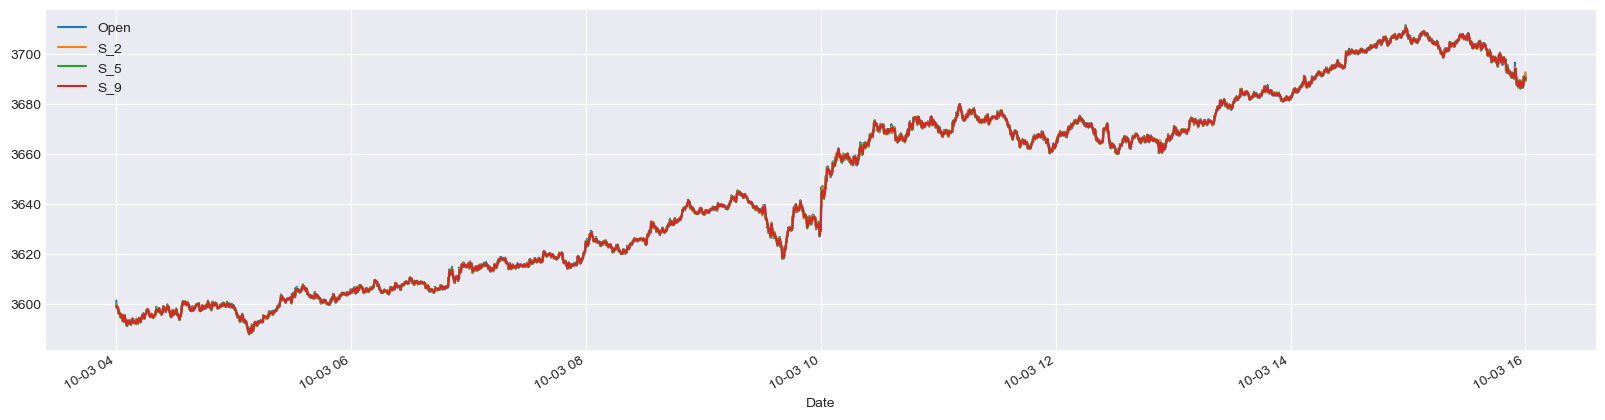

In [39]:
X[['Open' , 'S_2', 'S_5', 'S_9']].plot(figsize=(20,5) )

### Data Preprocessing, Scaling, Pipeline, Hyperparameters, Linear Regression

In [105]:
# Put scaling and then linear regression in the pipeline.
steps = [('scaler', StandardScaler()),
         ('linear', LinearRegression())]

# Defining pipeline
pipeline = Pipeline(steps)

In [106]:
# Use intercept as hyperparameter
parameters = {'linear__fit_intercept': [0, 1]}

### Grid Search Cross-Validation

In [107]:
# Use TimeSeriesSplit for cross validation
my_cv = TimeSeriesSplit(n_splits= 7)

# Define reg as variable for GridSearch function containing pipeline, hyperparameters
reg = GridSearchCV(pipeline, parameters, cv= my_cv)

### Split Train and Test Data

In [108]:
spilitting_ratio = .70

# Splitt data into two parts
split = int(spilitting_ratio * len(lr1_1min))

# Define train dataset
X_train = X[:split]
yU_train = yU[:split]
yD_train = yD[:split]

# Define test data
X_test = X[split:]

### Prediction

In [109]:
# Fit the model
reg.fit(X_train, yU_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=7, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__fit_intercept': [0, 1]})

In [110]:
# Print best parameter
print(reg.best_params_)

{'linear__fit_intercept': 1}


In [111]:
# Predict the upward deviation
yU_predict = reg.predict(X_test)
# yU_predict

In [112]:
# Fit the model
reg.fit(X_train, yD_train)

# Print best parameter
print(reg.best_params_)

# Predict the downward deviation
yD_predict = reg.predict(X_test)

{'linear__fit_intercept': 1}


- Create `yU_predict` and `yD_predict` columns in the `X_test`. Formulas for upward deviation and downward deviation are:

1.  Upward deviation  = High - Open

2.  Downward deviation = Open - Low

Upward and Downward deviation can not be negative. So, we replace negative values with zero.


In [113]:
# Create new column in X_test
X_test['yU_predict'] = yU_predict
X_test['yD_predict'] = yD_predict

# Assign zero to all negative predicted values to take into account real life conditions
X_test.loc[X_test['yU_predict'] < 0, 'yU_predict'] = 0
X_test.loc[X_test['yD_predict'] < 0, 'yD_predict'] = 0

In [114]:
# Add open values in ['yU_predict'] to get the predicted high column
X_test['P_H'] = X_test['Open'] + X_test['yU_predict']

# Subtract ['yD_predict'] values in open to get the predicted low column.
X_test['P_L'] = X_test['Open'] - X_test['yD_predict']
X_test.tail()

Open        BA_3   BA_5  BA_10  BA_CumSum       S_2  \
Date                                                                          
2022-10-03 15:59:52  3690.25  -59.666667  -63.4  -55.5      18472  3690.000   
2022-10-03 15:59:54  3689.50  -32.333333  -33.6  -51.4      18499  3689.500   
2022-10-03 15:59:56  3689.25  -69.666667  -30.8  -38.1      18497  3689.375   
2022-10-03 15:59:58  3690.75  469.333333  256.8  109.7      19880  3691.250   
2022-10-03 16:00:00  3692.50  425.666667  214.0   98.7      19776  3692.875   

                         S_5          S_9      Corr     Corr2  yU_predict  \
Date                                                                        
2022-10-03 15:59:52  3690.30  3690.194444  0.186292  0.328244    0.000000   
2022-10-03 15:59:54  3690.05  3690.138889  0.153850  0.541183    0.000000   
2022-10-03 15:59:56  3689.75  3690.055556  0.125214  0.592453    0.029869   
2022-10-03 15:59:58  3690.40  3690.444444  0.537446  0.759355    0.773957   
2022-10-03 16:00:00  3690.80  3690.666667  0.518210  0.569471    0.803355   

                     yD_predict          P_H          P_L  
Date                                                       
2022-10-03 15:59:52    0.214143  3690.250000  3690.035857  
2022-10-03 15:59:54    0.107634  3689.500000  3689.392366  
2022-10-03 15:59:56    0.054359  3689.279869  3689.195641  
2022-10-03 15:59:58    0.000000  3691.523957  3690.750000  
2022-10-03 16:00:00    0.000000  3693.303355  3692.500000

In [115]:
# Copy columns from ds prices to X_test
X_test[['Close', 'High', 'Low']] = lr1_1min[['Close', 'High', 'Low']][split:]
X_test.tail()

Open        BA_3   BA_5  BA_10  BA_CumSum       S_2  \
Date                                                                          
2022-10-03 15:59:52  3690.25  -59.666667  -63.4  -55.5      18472  3690.000   
2022-10-03 15:59:54  3689.50  -32.333333  -33.6  -51.4      18499  3689.500   
2022-10-03 15:59:56  3689.25  -69.666667  -30.8  -38.1      18497  3689.375   
2022-10-03 15:59:58  3690.75  469.333333  256.8  109.7      19880  3691.250   
2022-10-03 16:00:00  3692.50  425.666667  214.0   98.7      19776  3692.875   

                         S_5          S_9      Corr     Corr2  yU_predict  \
Date                                                                        
2022-10-03 15:59:52  3690.30  3690.194444  0.186292  0.328244    0.000000   
2022-10-03 15:59:54  3690.05  3690.138889  0.153850  0.541183    0.000000   
2022-10-03 15:59:56  3689.75  3690.055556  0.125214  0.592453    0.029869   
2022-10-03 15:59:58  3690.40  3690.444444  0.537446  0.759355    0.773957   
2022-10-03 16:00:00  3690.80  3690.666667  0.518210  0.569471    0.803355   

                     yD_predict          P_H          P_L    Close     High  \
Date                                                                          
2022-10-03 15:59:52    0.214143  3690.250000  3690.035857  3689.50  3690.25   
2022-10-03 15:59:54    0.107634  3689.500000  3689.392366  3689.50  3689.50   
2022-10-03 15:59:56    0.054359  3689.279869  3689.195641  3689.25  3689.25   
2022-10-03 15:59:58    0.000000  3691.523957  3690.750000  3693.25  3693.25   
2022-10-03 16:00:00    0.000000  3693.303355  3692.500000  3692.50  3692.50   

                         Low  
Date                          
2022-10-03 15:59:52  3689.50  
2022-10-03 15:59:54  3689.50  
2022-10-03 15:59:56  3689.25  
2022-10-03 15:59:58  3690.75  
2022-10-03 16:00:00  3692.50

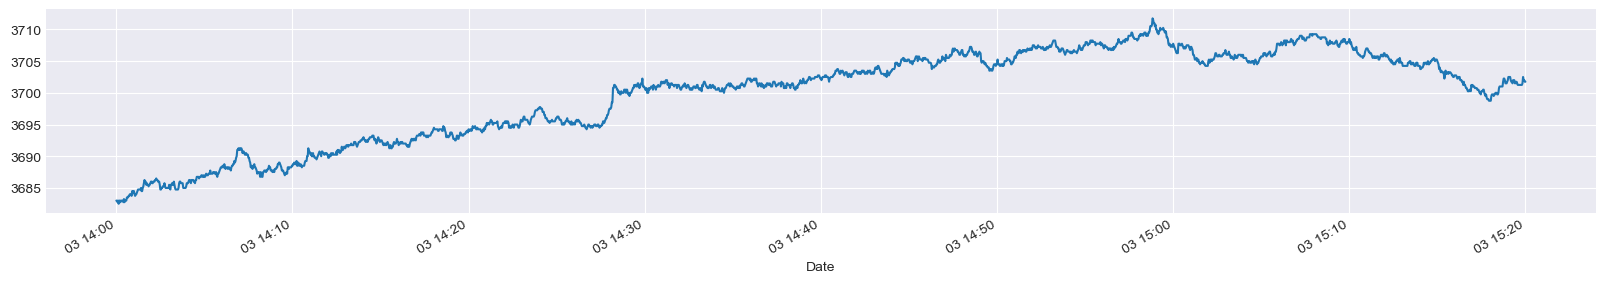

In [116]:
X['2022-10-03 14:00:00':'2022-10-03 15:20:00']['Open'].plot(figsize=(20,3) ) 

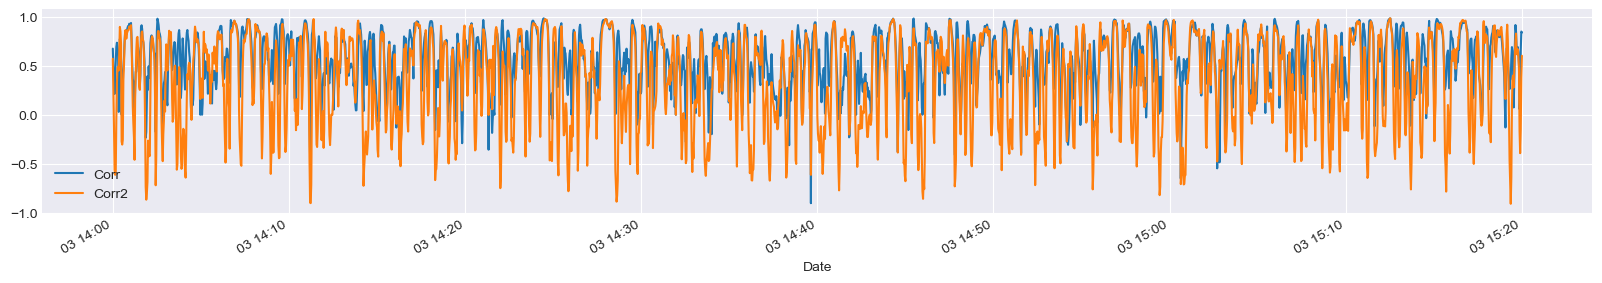

In [117]:
X['2022-10-03 14:00:00':'2022-10-03 15:20:00'][[ 'Corr', 'Corr2']].plot(figsize=(20,3) ) 

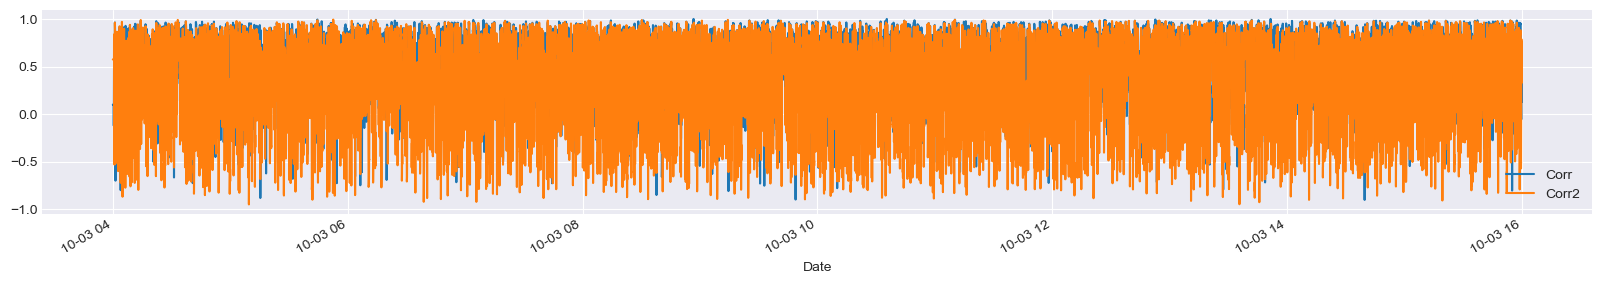

In [51]:
X[[ 'Corr', 'Corr2']].plot(figsize=(20,3) )  # # THIS CORR2 IS:  lr1_1min['Close'].shift(1).rolling(10).corr(lr1_1min['S_9'].shift(1))  UPWARD LR

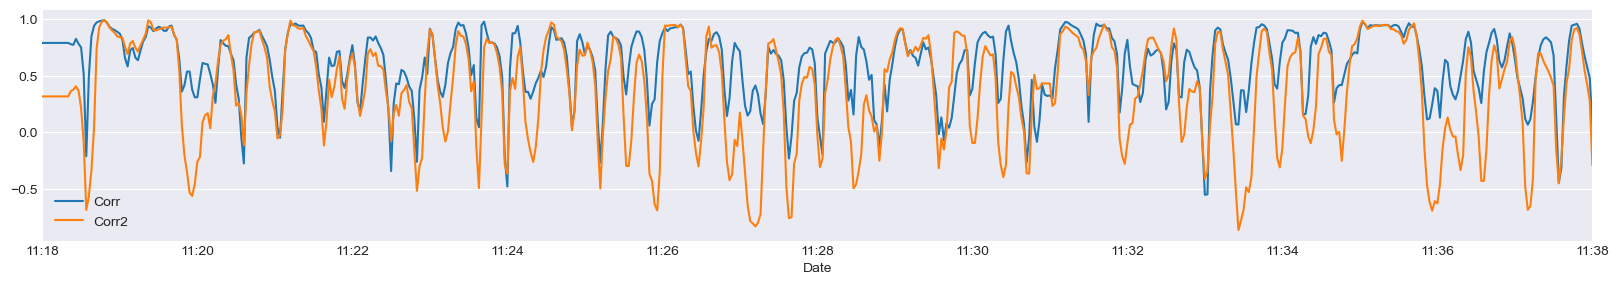

In [240]:
 # FROM  PREVIOES NB WITH DOWNWARD RN ... x[[ 'Corr', 'Corr2']].plot(figsize=(20,3) )  # # THIS CORR2 IS:  lr1_1min['Close'].shift(1).rolling(10).corr(lr1_1min['S_9'].shift(1))   DOWNWARD LR

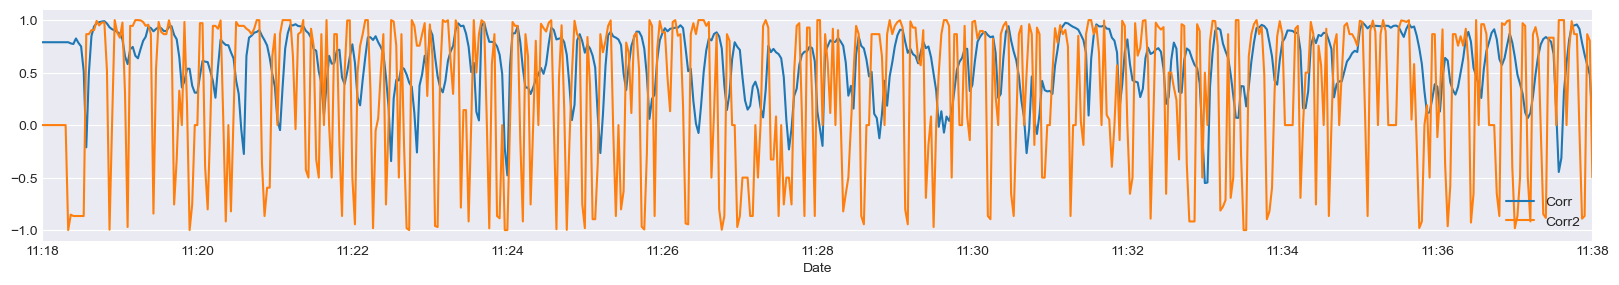

In [211]:
####   LEAVE FOR COMPARESON !!!dOWNWARD LR   X[[ 'Corr', 'Corr2']].plot(figsize=(20,3) ) # THIS CORR2 IS:  lr1_1min['Close'].shift(1).rolling(3).corr(lr1_1min['S_9'].shift(1))

##### VERIFY IF DOWNWARD RUN HAVE OPPOSITE PREPONDERANCE (BELLOW 0) 
## Conclusion 1: The Corr and Corr2 only show the positive Correlation between Price and Mean (which is to be expected)!

## Conclusion 2: Definite positive Correlation between Price and short, mid and longer BidAsk means. Absolute must indicator for detection of Market bias of Up/Down movement.

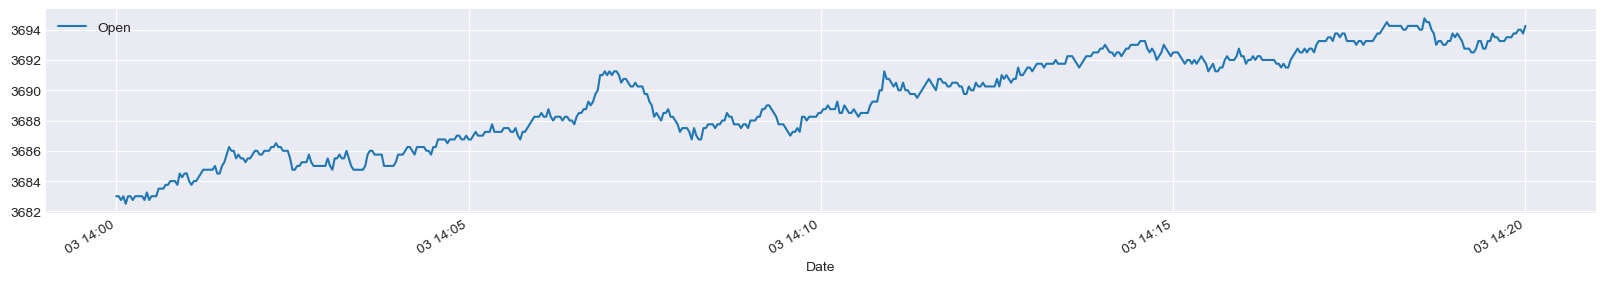

In [74]:
X['2022-10-03 14:00:00':'2022-10-03 14:20:00'][['Open']].plot(figsize=(20,3))    

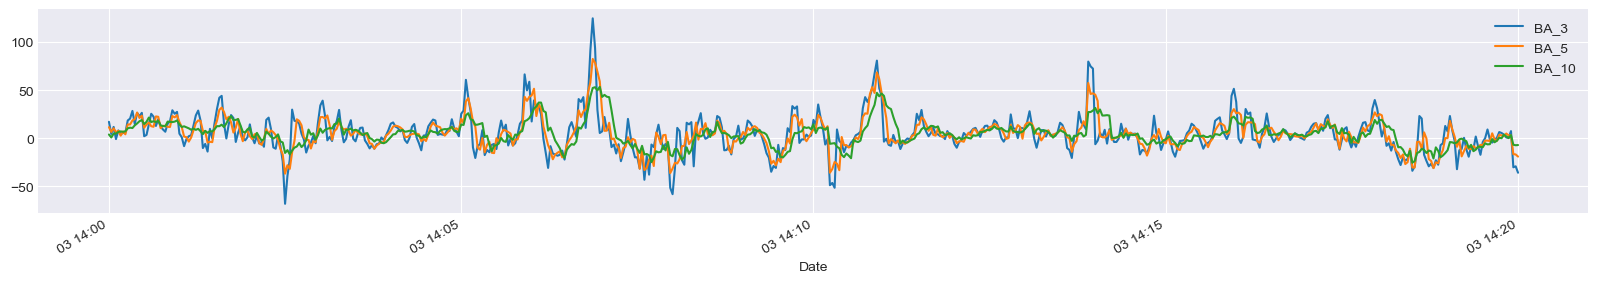

In [73]:
X['2022-10-03 14:00:00':'2022-10-03 14:20:00'][['BA_3',	'BA_5',	'BA_10']].plot(figsize=(20,3))    

### The plot below is from Downward while above from Upward run. 

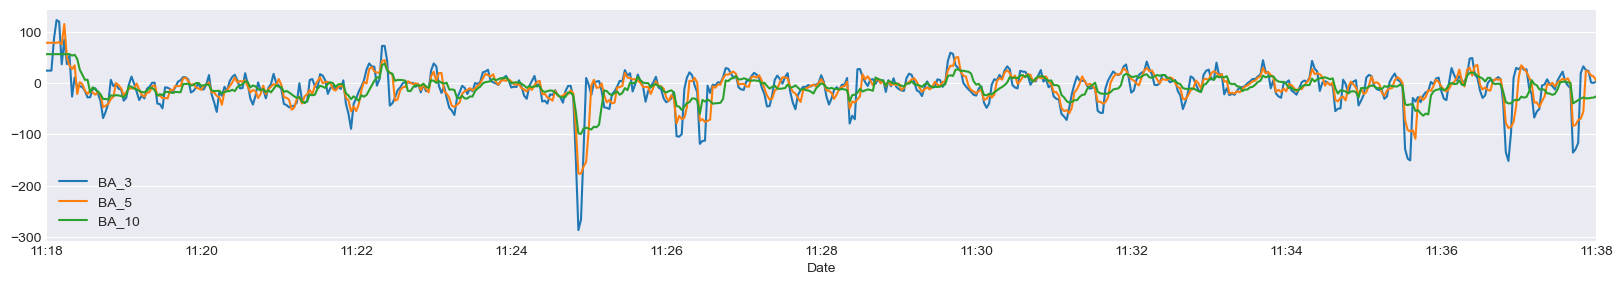

In [241]:
#   !!!!   #  X[['BA_3',	'BA_5',	'BA_10']].plot(figsize=(20,3))     #!!!!!  Do not touch this is just for compareson between Down and Up Runs.

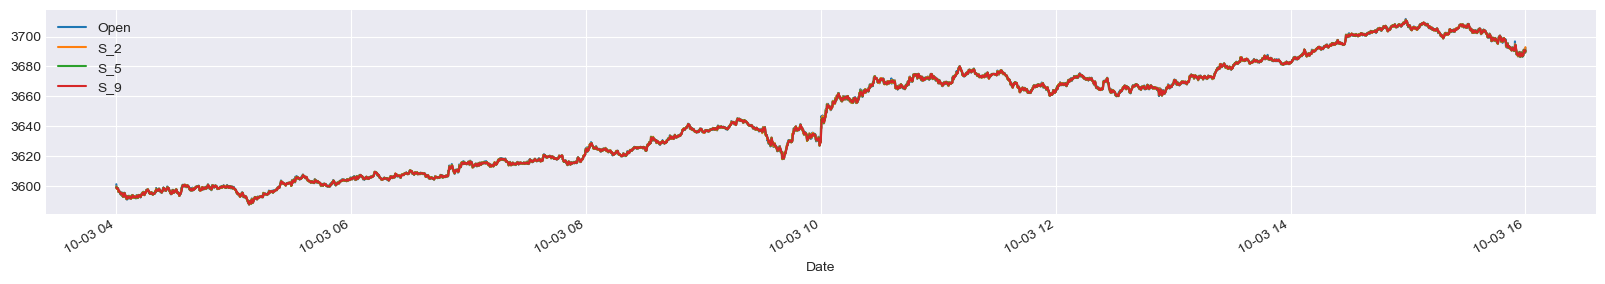

In [75]:
X[['Open' , 'S_2', 'S_5', 'S_9']].plot(figsize=(20,3) )

#### Conclusion: Corr is above mainly between 1 & 0 in this clearly Downward LR. Can we expect that it will be below 0 (between -1 & 0) in a clearly Upward Run?
WE CAN NOT. IT JUST REFLECTS THE POSITIVE CORR BETWEEN BIDASK & PRICE!

In [167]:
# Store the data for further metrics analysis
X_test[['Close', 'High','P_H', 'Low', 'P_L', 'CorrBidAsk1', 'CorrBidAsk12', 'CorrBidAsk3', 'CorrBidAsk4']].to_csv('test_dataset_pred_high_low_LR1_UPWARD.csv', index = True)

KeyError: "['CorrBidAsk1', 'CorrBidAsk12', 'CorrBidAsk3', 'CorrBidAsk4'] not in index"

###  Strategy Analytics

In [119]:
import numpy as np
import pandas as pd
# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid') 
import warnings
warnings.filterwarnings("ignore")

In [120]:
# Importing the data
test_dataset = pd.read_csv('test_dataset_pred_high_low_LR1_UPWARD.csv', index_col='Date')

# Converting index into datetime format
test_dataset.index = pd.to_datetime(test_dataset.index)

# Printing the tail of test_dataset
test_dataset.tail()

Close     High          P_H      Low          P_L
Date                                                                    
2022-10-03 15:59:52  3689.50  3690.25  3690.250000  3689.50  3690.035857
2022-10-03 15:59:54  3689.50  3689.50  3689.500000  3689.50  3689.392366
2022-10-03 15:59:56  3689.25  3689.25  3689.279869  3689.25  3689.195641
2022-10-03 15:59:58  3693.25  3693.25  3691.523957  3690.75  3690.750000
2022-10-03 16:00:00  3692.50  3692.50  3693.303355  3692.50  3692.500000

### Signal Generation

In [121]:
# Initialise signal column to be zero
test_dataset['Signal'] = 0

# When buying, assigning signal value as +1  UPWARD EXPECTATION
test_dataset.loc[(test_dataset['High'] > test_dataset['P_H']) & ( test_dataset['Low'] > test_dataset['P_L']), 'Signal'] = 1

# When selling, assigning signal value as -1  DOWNWARD EXPECTATION
test_dataset.loc[(test_dataset['High'] < test_dataset['P_H']) & ( test_dataset['Low'] < test_dataset['P_L']), 'Signal'] = -1


### Strategy Returns metrics

In [133]:
# Compute returns
test_dataset['asset1_returns'] = test_dataset['Close'].pct_change()

# Compute strategy returns
test_dataset['strategy_returns'] = test_dataset['asset1_returns'] *  (test_dataset['Signal'].shift(1))

# Printing tail of the test_dataset
test_dataset.tail()

# Save the test_dataset as ml_regression_asset1min_strategy_data.csv for further analysis
test_dataset.to_csv('ml_regression_es_strategy_dataUPward1.csv', index = True)

### Plot

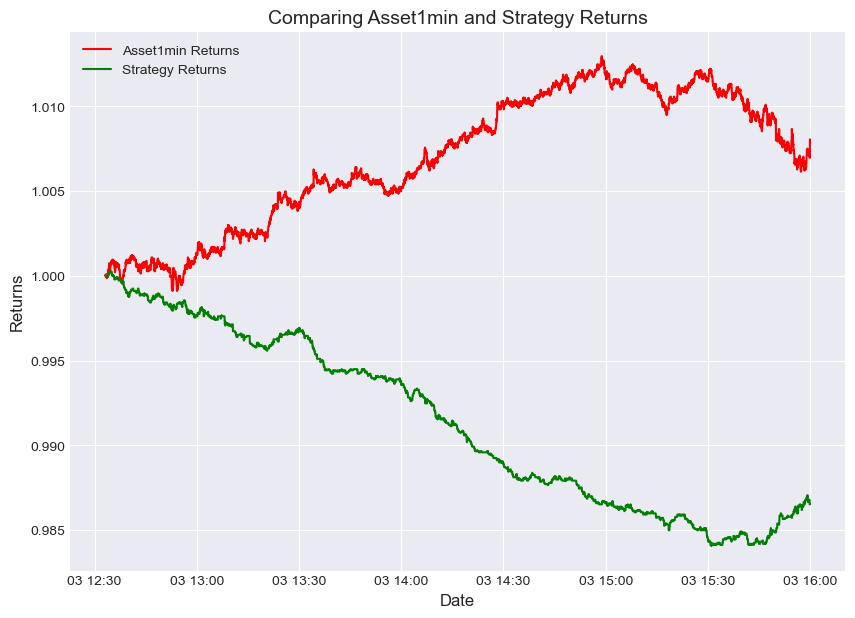

In [132]:
plt.figure(figsize=(10, 7))

# Plotting gld_returns
plt.plot(((test_dataset['asset1_returns'][:]+1).cumprod()),
         color='r', label='Asset1min Returns')

# Plotting test_dataset
plt.plot(((test_dataset['strategy_returns'][:]+1).cumprod()),
         color='g', label='Strategy Returns')

# x-labeling
plt.xlabel('Date', fontsize=12)

# y-labeling
plt.ylabel('Returns', fontsize=12)

# Titlename
plt.title('Comparing Asset1min and Strategy Returns', fontsize=14)
plt.legend()
plt.show()

### Performance Analysis

In [ ]:
# !pip install pyfolio

In [124]:
import pandas as pd
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

#For strategy analysis
import pyfolio as pf

In [135]:
strategy_data = pd.read_csv( 'ml_regression_es_strategy_dataUPward1.csv', parse_dates=['Date'], index_col='Date')
strategy_data.fillna(method='bfill', inplace=True)
strategy_data.head()


Close     High          P_H      Low          P_L  \
Date                                                                       
2022-10-03 12:33:10  3663.75  3663.75  3663.843521  3663.75  3663.684536   
2022-10-03 12:33:12  3664.00  3664.00  3664.028136  3664.00  3663.874612   
2022-10-03 12:33:14  3663.75  3663.75  3663.873444  3663.75  3663.713578   
2022-10-03 12:33:16  3664.00  3664.00  3663.856569  3663.75  3663.699938   
2022-10-03 12:33:18  3664.00  3664.00  3664.064959  3664.00  3663.907352   

                     Signal  asset1_returns  strategy_returns  
Date                                                           
2022-10-03 12:33:10       0        0.000068               0.0  
2022-10-03 12:33:12       0        0.000068               0.0  
2022-10-03 12:33:14       0       -0.000068              -0.0  
2022-10-03 12:33:16       1        0.000068               0.0  
2022-10-03 12:33:18       0        0.000000               0.0

- Sharpe Ratio: a measure of the risk-adjusted return of an investment or trading strategy. 
- It is generally considered that a Sharpe ratio of 1 or higher is good, while a Sharpe ratio below 1 may not be considered as attractive.

In [138]:
# The below function returns the Sharpe ratio for the excess returns
def annualized_sharpe_ratio(returns, N= 1200):
    return np.sqrt(N) * returns.mean() / returns.std()


# Calculate the excess daily return by assuming an daily risk free rate of return of 5%
excess_daily_strategy_return = strategy_data['strategy_returns'] - 0.01 / 1200

# Calculate the annualized Sharpe ratio
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print('Sharpe', sharpe)

Sharpe -8.989684403913623


## NOT GOOD SHARPE RATIO

In [140]:
def get_trades(data, close_column, signal_column):
    """Function to generate trade details
    """
    # Intializing trades dataframe
    trades = pd.DataFrame()

    # There are no current positions open at the beginning
    current_position = 0

    # Creating an empty string for entry_date
    entry_date = ''

    for i in data.index:

        # Save the signal generated on date i in 'new_position'
        new_position = data.loc[i, signal_column]

        # We don't take any action if the current_position is equal to the signal generated at date i.
        # The below code will run if the signal generated is not equal to current_position.
        if new_position != current_position:

            # The below code will run if the entry_date is not empty
            if entry_date != '':

                # save entry price in entry_price
                entry_price = data.loc[entry_date, close_column]

                # Since the signal and current_position are not equal, we exit the position at date i
                exit_date = i

                # Save exit price in exit_price
                exit_price = data.loc[exit_date, close_column]

                # Create a dataframe trade_details with trade details
                trade_details = pd.DataFrame(
                    [(current_position, entry_date, entry_price, exit_date, exit_price)])

                # Update the trades dataframe in every loop
                trades = trades.append(trade_details, ignore_index=True)

                # Reset the entry_date
                entry_date = ''

            # If the new_position i.e. signal generated at i is not '0' and also not equal to current_position, we will enter either short or long trade
            if new_position != 0:

                # Save entry date of trade in entry_date
                entry_date = i

            # Update the current_position with signal generated on date i
            current_position = new_position

    # Creating below five columns in trades dataframe.
    trades.columns = ['Position', 'Entry Date',
                      'Entry Price', 'Exit Date', 'Exit Price']

    # Create a column in trades dataframe to store the profit and loss from each trade
    trades['PnL'] = (trades['Exit Price'] -
                     trades['Entry Price']) * trades['Position']

    # Returns 'trades' dataframe
    return trades

In [142]:
def get_analytics(trades):
    """Function to generate strategy analytics
    """

    analytics = pd.DataFrame(index=['Strategy'])
    # Number of long trades
    analytics['num_of_long'] = len(trades.loc[trades.Position == 1])
    # Number of short trades
    analytics['num_of_short'] = len(trades.loc[trades.Position == -1])
    # Total number of trades
    analytics['total_trades'] = analytics.num_of_long + analytics.num_of_short

    # Gross Profit
    analytics['gross_profit'] = trades.loc[trades.PnL > 0].PnL.sum()
    # Gross Loss
    analytics['gross_loss'] = trades.loc[trades.PnL < 0].PnL.sum()

    # Net Profit
    analytics['net_profit'] = trades.PnL.sum()

    # Profitable trades
    analytics['winners'] = len(trades.loc[trades.PnL > 0])
    # Loss-making trades
    analytics['losers'] = len(trades.loc[trades.PnL <= 0])
    # Win percentage
    analytics['win_percentage'] = 100*analytics.winners/analytics.total_trades
    # Loss percentage
    analytics['loss_percentage'] = 100*analytics.losers/analytics.total_trades
    # Per trade profit/loss of winning trades
    analytics['per_trade_PnL_winners'] = trades.loc[trades.PnL > 0].PnL.mean()
    # Per trade profit/loss of losing trades
    analytics['per_trade_PnL_losers'] = trades.loc[trades.PnL <= 0].PnL.mean()

    return analytics.T

In [143]:
# Using get_trades function to evaluate trades detail
trades = get_trades(strategy_data, 'Close', 'Signal')
print('Trade Details')

# Printing trades dataframe
trades.head(5)

Trade Details


Position          Entry Date  Entry Price           Exit Date  Exit Price  \
0         1 2022-10-03 12:33:16      3664.00 2022-10-03 12:33:18     3664.00   
1        -1 2022-10-03 12:33:20      3663.50 2022-10-03 12:33:22     3663.50   
2        -1 2022-10-03 12:33:54      3664.00 2022-10-03 12:33:56     3664.25   
3         1 2022-10-03 12:33:56      3664.25 2022-10-03 12:33:58     3664.75   
4         1 2022-10-03 12:34:04      3665.00 2022-10-03 12:34:06     3665.00   

    PnL  
0  0.00  
1 -0.00  
2 -0.25  
3  0.50  
4  0.00

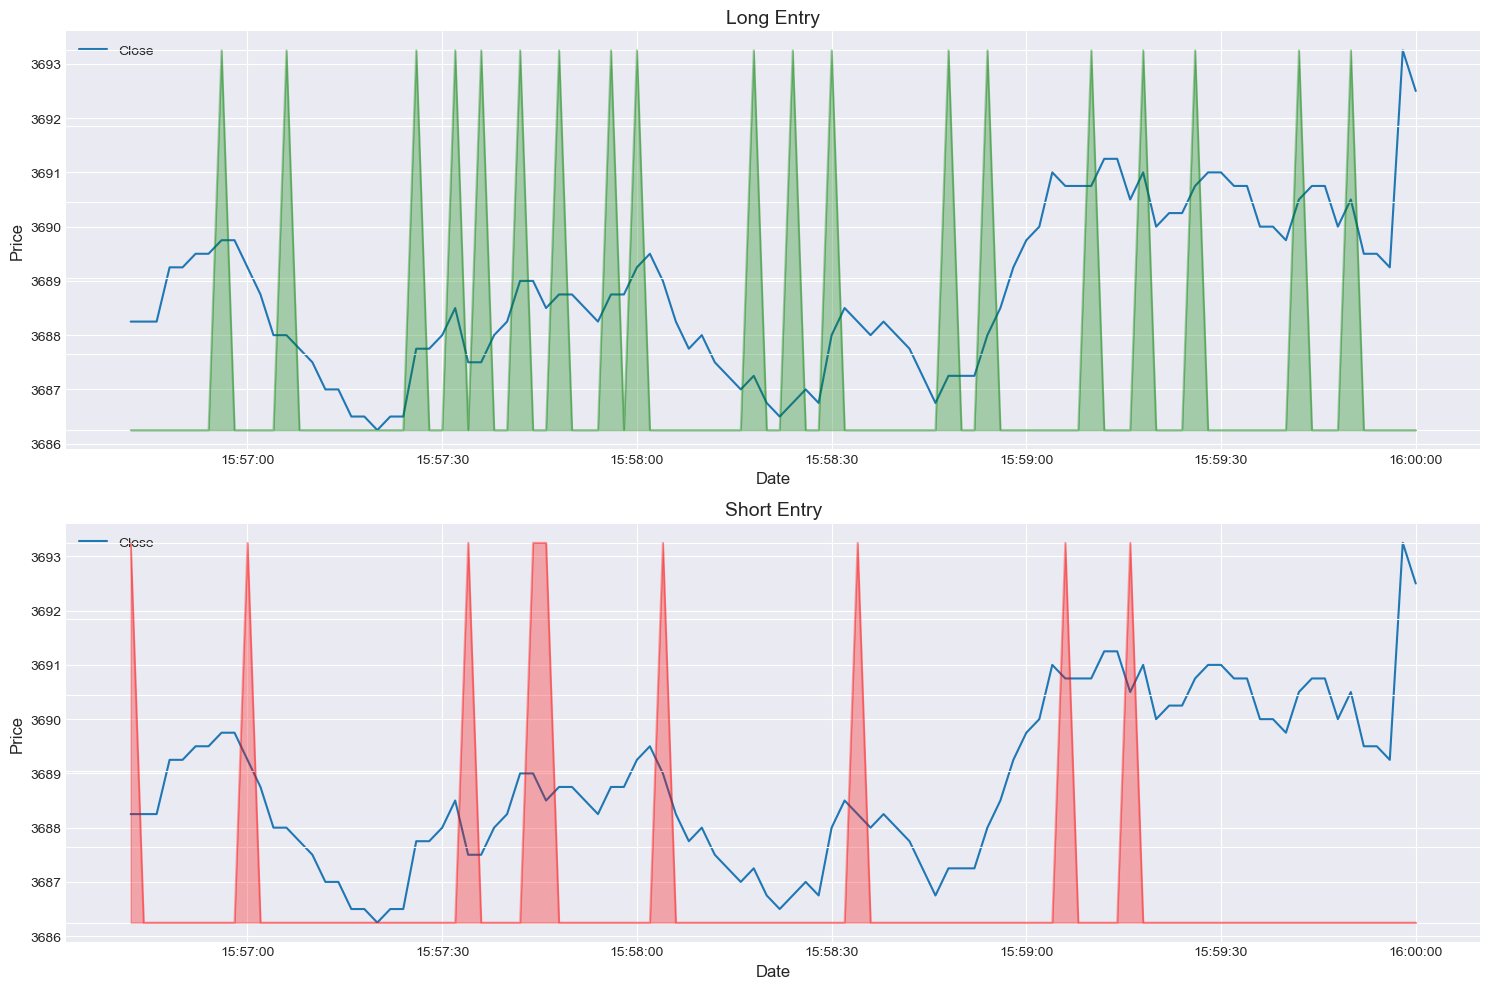

In [145]:
import matplotlib.pyplot as plt

# Showing the last 100 points for illustration purpose
test_dataset_for_plot = strategy_data[-100:]

# When signal is 1 we take long entry
test_dataset_for_plot['long_entry'] = test_dataset_for_plot.Signal == 1

# When signal is -1 we take short entry
test_dataset_for_plot['short_entry'] = test_dataset_for_plot.Signal == -1

fig = plt.figure(figsize=(15, 10))

# Sub plot for the long entry
ax = fig.add_subplot(211)

# Plotting close price
ax.plot(test_dataset_for_plot['Close'], label='Close')

# Set the title and axis labels
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Long Entry', fontsize=14)
ax.legend()


# Twinx() creates a new axes with an invisible x-axis and y axis positioned opposite to the original one
ax2 = ax.twinx()

# Plotting long entry
ax2.plot(test_dataset_for_plot['long_entry'], color='g', alpha=0.3)
ax2.fill_between(test_dataset_for_plot['long_entry'].index,
                 test_dataset_for_plot['long_entry'].values, color='g', alpha=0.3)
ax2.tick_params(labelright=False)

# Sub plot for the short position
ax = fig.add_subplot(212)

# Plot the close price
ax.plot(test_dataset_for_plot['Close'], label='Close')


# Set the title and axis labels
ax.set_title('Short Entry', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.legend()

# Plotting short entry
ax2 = ax.twinx()
ax2.plot(test_dataset_for_plot['short_entry'], color='r', alpha=0.3)
ax2.fill_between(test_dataset_for_plot['short_entry'].index,
                 test_dataset_for_plot['short_entry'].values, color='r', alpha=0.3)
ax2.tick_params(labelright=False)

plt.tight_layout()
plt.show()

In [146]:
# Calling get_analytics to analyse trades
analytics = get_analytics(trades)
print('Trade Analytics')

# Rounding off to two decimal places
round(analytics, 2)

Trade Analytics


Strategy
num_of_long              768.00
num_of_short             732.00
total_trades            1500.00
gross_profit             128.00
gross_loss              -178.00
net_profit               -50.00
winners                  358.00
losers                  1142.00
win_percentage            23.87
loss_percentage           76.13
per_trade_PnL_winners      0.36
per_trade_PnL_losers      -0.16

In [147]:
# Calculating close price change percentage
strategy_data['returns'] = strategy_data.Close.pct_change()

# Strategy return depends on the last day signal
strategy_data['strategy_returns'] = strategy_data['returns'] * strategy_data['Signal'].shift(1)
strategy_data.head()

Close     High          P_H      Low          P_L  \
Date                                                                       
2022-10-03 12:33:10  3663.75  3663.75  3663.843521  3663.75  3663.684536   
2022-10-03 12:33:12  3664.00  3664.00  3664.028136  3664.00  3663.874612   
2022-10-03 12:33:14  3663.75  3663.75  3663.873444  3663.75  3663.713578   
2022-10-03 12:33:16  3664.00  3664.00  3663.856569  3663.75  3663.699938   
2022-10-03 12:33:18  3664.00  3664.00  3664.064959  3664.00  3663.907352   

                     Signal  asset1_returns  strategy_returns   returns  
Date                                                                     
2022-10-03 12:33:10       0        0.000068               NaN       NaN  
2022-10-03 12:33:12       0        0.000068               0.0  0.000068  
2022-10-03 12:33:14       0       -0.000068              -0.0 -0.000068  
2022-10-03 12:33:16       1        0.000068               0.0  0.000068  
2022-10-03 12:33:18       0        0.000000               0.0  0.000000

### Strategy Analysis

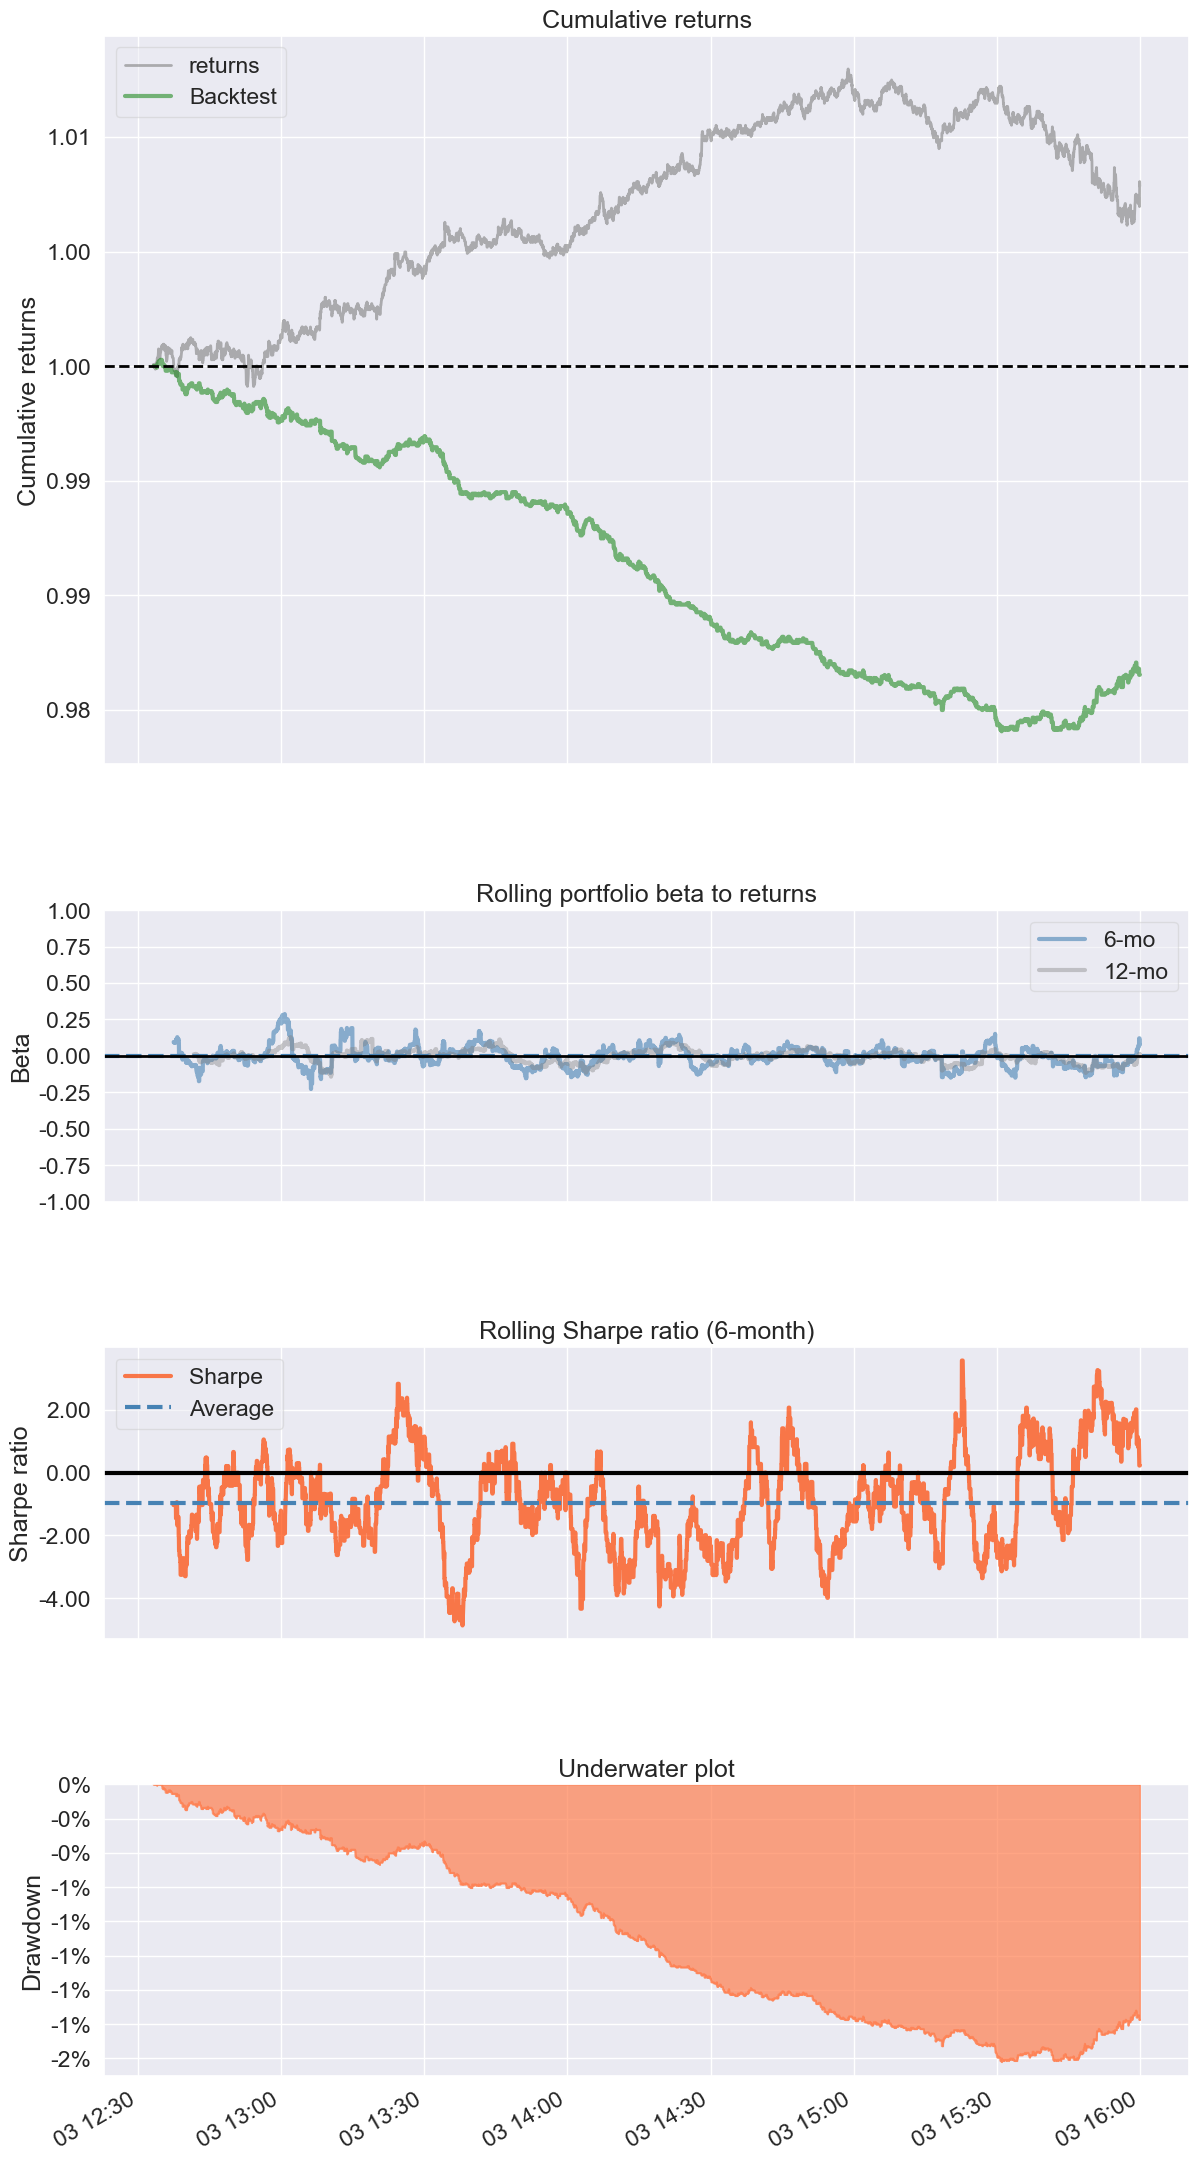

In [148]:
#Checking for NaN values
strategy_data.isna().sum()

# Dropping the NaN values 
strategy_data.dropna(inplace = True)
strategy_data.head()

# Creating pyfolio tear sheet
pf.create_simple_tear_sheet(strategy_data['strategy_returns'], benchmark_rets = strategy_data['returns']) 